<a href="https://colab.research.google.com/github/mkbahk/DeepLearningwithKeras/blob/master/3_5_%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC_%EB%B6%84%EB%A5%98_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

로이터 데이타텟 로드하기






In [88]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [89]:
len(train_data)

8982

In [90]:
len(test_data)

2246

In [91]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [92]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [93]:
train_labels[10]

3

데이터 인코딩하기

In [94]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
# end of def

x_train = vectorize_sequences(train_data) #훈련데이타 벡터 변환
x_test = vectorize_sequences(test_data) #테스트 데이타 벡터 변환

In [95]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
# end of def

one_hot_train_labels = to_one_hot(train_labels) #훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) #테스트 레이블 벡터 변환

모델정의하기

In [96]:
from keras import models, layers, regularizers

model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)              

모델 컴파일

In [97]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

검증 세트 준비하기

In [98]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

모델 훈련하기

In [99]:
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=20, batch_size=256, validation_data=(x_val, y_val))
result = model.evaluate(x=x_test, y=one_hot_test_labels)

Epoch 1/20
32/32 [==============================] - 2s 47ms/step - loss: 9.4841 - accuracy: 0.2764 - val_loss: 6.2843 - val_accuracy: 0.3540
Epoch 2/20
32/32 [==============================] - 1s 39ms/step - loss: 5.6825 - accuracy: 0.3636 - val_loss: 4.6981 - val_accuracy: 0.3530
Epoch 3/20
32/32 [==============================] - 1s 37ms/step - loss: 4.3389 - accuracy: 0.3988 - val_loss: 3.6014 - val_accuracy: 0.5330
Epoch 4/20
32/32 [==============================] - 1s 38ms/step - loss: 3.4928 - accuracy: 0.4786 - val_loss: 3.1051 - val_accuracy: 0.5340
Epoch 5/20
32/32 [==============================] - 1s 37ms/step - loss: 3.1418 - accuracy: 0.5061 - val_loss: 2.8566 - val_accuracy: 0.5450
Epoch 6/20
32/32 [==============================] - 1s 37ms/step - loss: 2.9464 - accuracy: 0.5202 - val_loss: 2.7120 - val_accuracy: 0.5420
Epoch 7/20
32/32 [==============================] - 1s 36ms/step - loss: 2.8539 - accuracy: 0.5237 - val_loss: 2.6704 - val_accuracy: 0.5460
Epoch 8/20
32

CPU, GPU, TPU 사용시의 결과비교:

CPU:

Epoch 20/20
16/16 [==============================] - 1s 46ms/step - loss: 0.1315 - accuracy: 0.9550 - val_loss: 1.5239 - val_accuracy: 0.7670
71/71 [==============================] - 0s 3ms/step - loss: 1.8289 - accuracy: 0.7524

GPU:

Epoch 20/20
16/16 [==============================] - 0s 14ms/step - loss: 0.1678 - accuracy: 0.9422 - val_loss: 1.4124 - val_accuracy: 0.7930
71/71 [==============================] - 0s 3ms/step - loss: 1.7150 - accuracy: 0.7596

TPU:

Epoch 20/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1108 - accuracy: 0.9573 - val_loss: 1.4943 - val_accuracy: 0.7760
71/71 [==============================] - 0s 3ms/step - loss: 1.7421 - accuracy: 0.7609

dropout 적용 후:

Epoch 20/20
16/16 [==============================] - 1s 54ms/step - loss: 1.1207 - accuracy: 0.6953 - val_loss: 1.7655 - val_accuracy: 0.6920
71/71 [==============================] - 0s 3ms/step - loss: 1.9858 - accuracy: 0.6719

l1_l2 regularization 적용 후:

Epoch 20/20
16/16 [==============================] - 1s 60ms/step - loss: 2.7187 - accuracy: 0.4607 - val_loss: 2.5987 - val_accuracy: 0.5150
71/71 [==============================] - 0s 4ms/step - loss: 2.6204 - accuracy: 0.5165



훈련과 검증 손실

In [100]:
history.history

{'accuracy': [0.2763718366622925,
  0.3635680377483368,
  0.3987722396850586,
  0.47857680916786194,
  0.506138801574707,
  0.5201703906059265,
  0.5236783027648926,
  0.5255575180053711,
  0.527060866355896,
  0.5278126001358032,
  0.5285642743110657,
  0.5313204526901245,
  0.5333249568939209,
  0.5350789427757263,
  0.5377098321914673,
  0.5360811948776245,
  0.5417188405990601,
  0.5404660701751709,
  0.5467301607131958,
  0.5497369170188904],
 'loss': [9.484103202819824,
  5.682516574859619,
  4.338872909545898,
  3.4928224086761475,
  3.141772747039795,
  2.94635272026062,
  2.8538832664489746,
  2.7846298217773438,
  2.7529773712158203,
  2.7150485515594482,
  2.69031023979187,
  2.6764931678771973,
  2.664902448654175,
  2.6341614723205566,
  2.6275393962860107,
  2.6215505599975586,
  2.6057586669921875,
  2.602742910385132,
  2.5887372493743896,
  2.6012802124023438],
 'val_accuracy': [0.3540000021457672,
  0.3529999852180481,
  0.5329999923706055,
  0.5339999794960022,
  0.5

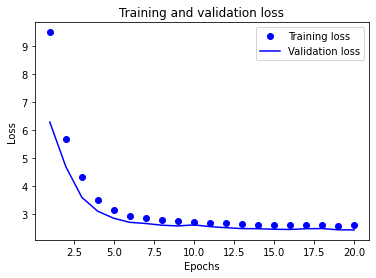

In [101]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') #'bo'는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') #'b'는 파란색 실선을 의미합니다.

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


훈련 검증 정확도 그리기

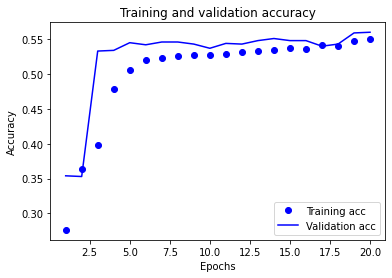

In [102]:
plt.clf() #그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

새로운 데이타로 예측하기

In [103]:
predictions =  model.predict(x_test)

In [104]:
predictions[0].shape

(46,)

In [105]:
np.sum(predictions[0])

0.9999999

In [106]:
np.argmax(predictions[0])

3